In [1]:
import json
import numpy as np
import pandas as pd
import pandapower as pp
import geopandas as gpd
import matplotlib.pyplot as plt
import pandapower.plotting as pplot
from shapely.geometry import Point
from geopandas import GeoSeries
from shapely.geometry import Polygon

#Defining grid parametersin degrees
width=15/111111
length=25/111111
rd=10/111111
grid_width=55/111111
grid_length=60/111111

#Defining reference point on earth
lat=-6.577178
long=-77.855809



In [2]:
#Defining 68 points for load buses
i=0 
j=0
load_bus=[]

while j < 5 : 
    for i in range (0,6) :
        bus1 = { 'Name' : 'Load bus' + str(i*2+j*12), 'geometry' : Point((long+rd+width+i*grid_width), (lat+rd+length+j*grid_length)) }  
        load_bus.append(bus1)
        bus2 = { 'Name' : 'Load bus' + str(i*2+1+j*12), 'geometry' : Point((long+rd+width*2+i*grid_width), (lat+rd+length+j*grid_length)) }  
        load_bus.append(bus2)
        i+=1
    j+=1

for k in range (0,3) :
    bus1 = { 'Name' : 'Load bus' + str(k*2+5*12), 'geometry' : Point((long+rd+width+k*grid_width), (lat+rd+length+5*grid_length)) }  
    load_bus.append(bus1)
    bus2 = { 'Name' : 'Load bus' + str(k*2+1+5*12), 'geometry' : Point((long+rd+width*2+k*grid_width), (lat+rd+length+5*grid_length)) }  
    load_bus.append(bus2)
    i+=1

#define bus for 2 house + chapel
    bus3 = { 'Name' : 'Load bus' + str(66), 'geometry' : Point((long+rd+width+3*grid_width), (lat+rd+length+5*grid_length)) }  
    load_bus.append(bus3)
    
#define bus for school
    bus4 = { 'Name' : 'Load bus' + str(67), 'geometry' : Point((long+rd+width*3+3*grid_width), (lat+rd+length+5*grid_length)) }  
    load_bus.append(bus4)    

placeholder1=pd.DataFrame(data=load_bus)
load_bus_loc = gpd.GeoDataFrame(placeholder1, crs="EPSG:4326")

#load_bus_loc.plot()



<AxesSubplot:>

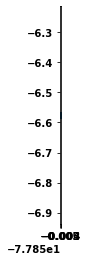

In [3]:
#Defining 2 points for transformer buses 
j=0
trans_bus=[]

#while j < 6 : 
#    bus1 = { 'Name' : 'Trans bus' + str(j*2), 'geometry' : Point((long), (lat+rd+length+j*grid_length)) }  
#    trans_bus.append(bus1)
#    bus2 = { 'Name' : 'Trans bus' + str(1+j*2), 'geometry' : Point((long+rd+6*grid_width), (lat+rd+length+j*grid_length)) }  
#    trans_bus.append(bus2)
#    j+=1

bus1 = { 'Name' : 'Trans bus 0', 'geometry' : Point((long), (lat+3*grid_length+rd/2)) }  
trans_bus.append(bus1)
bus2 = { 'Name' : 'Trans bus 1', 'geometry' : Point((long+rd+6*grid_width), (lat+3*grid_length+rd/2)) }  
trans_bus.append(bus2)

placeholder2=pd.DataFrame(data=trans_bus)
trans_bus_loc = gpd.GeoDataFrame(placeholder2, crs="EPSG:4326")

trans_bus_loc.plot()


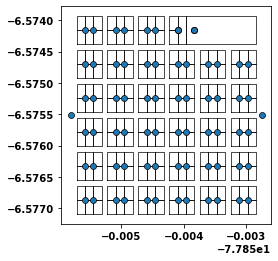

In [4]:
#Defining 201 polygons for houses & school
ii=0
i=0 
j=0
polygon=[]

while j < 5 : 
    for i in range (0,6) :
        for ii in range (0,3) :
            poly1 = { 'Name' : 'House' + str(ii*2+i*6+j*36), 'geometry' : Polygon([(long+rd+ii*width+i*grid_width, lat+rd+j*grid_length), (long+rd+width+ii*width+i*grid_width, lat+rd+j*grid_length), (long+rd+width+ii*width+i*grid_width, lat+rd+length+j*grid_length), (long+rd+ii*width+i*grid_width, lat+rd+length+j*grid_length)]) }  
            polygon.append(poly1)
            poly2 = { 'Name' : 'House' + str(ii*2+1+i*6+j*36), 'geometry' : Polygon([(long+rd+ii*width+i*grid_width, lat+rd+length+j*grid_length), (long+rd+width+ii*width+i*grid_width, lat+rd+length+j*grid_length), (long+rd+width+ii*width+i*grid_width, lat+rd+length+length+j*grid_length), (long+rd+ii*width+i*grid_width, lat+rd+length+length+j*grid_length)]) }  
            polygon.append(poly2)
            ii+=1        
        i+=1
    j+=1

#defining top row
ii=0
i=0 
    
for i in range (0,3) :
    for ii in range (0,3) :
        poly1 = { 'Name' : 'House' + str(ii*2+i*6+5*36), 'geometry' : Polygon([(long+rd+ii*width+i*grid_width, lat+rd+5*grid_length), (long+rd+width+ii*width+i*grid_width, lat+rd+5*grid_length), (long+rd+width+ii*width+i*grid_width, lat+rd+length+5*grid_length), (long+rd+ii*width+i*grid_width, lat+rd+length+5*grid_length)]) }  
        polygon.append(poly1)
        poly2 = { 'Name' : 'House' + str(ii*2+1+i*6+5*36), 'geometry' : Polygon([(long+rd+ii*width+i*grid_width, lat+rd+length+5*grid_length), (long+rd+width+ii*width+i*grid_width, lat+rd+length+5*grid_length), (long+rd+width+ii*width+i*grid_width, lat+rd+length+length+5*grid_length), (long+rd+ii*width+i*grid_width, lat+rd+length+length+5*grid_length)]) }  
        polygon.append(poly2)
        ii+=1        
    i+=1

for i in range (3,4) :
    for ii in range (0,1) :
        poly1 = { 'Name' : 'House' + str(ii*2+i*6+5*36), 'geometry' : Polygon([(long+rd+ii*width+i*grid_width, lat+rd+5*grid_length), (long+rd+width+ii*width+i*grid_width, lat+rd+5*grid_length), (long+rd+width+ii*width+i*grid_width, lat+rd+length+5*grid_length), (long+rd+ii*width+i*grid_width, lat+rd+length+5*grid_length)]) }  
        polygon.append(poly1)
        poly2 = { 'Name' : 'House' + str(ii*2+1+i*6+5*36), 'geometry' : Polygon([(long+rd+ii*width+i*grid_width, lat+rd+length+5*grid_length), (long+rd+width+ii*width+i*grid_width, lat+rd+length+5*grid_length), (long+rd+width+ii*width+i*grid_width, lat+rd+length+length+5*grid_length), (long+rd+ii*width+i*grid_width, lat+rd+length+length+5*grid_length)]) }  
        polygon.append(poly2)
        ii+=1        
    i+=1

#defining chapel manually
chapel = { 'Name' : 'Chapel', 'geometry' : Polygon([(long+rd+width+3*grid_width, lat+rd+5*grid_length), 
                                                    (long+rd+width*2+3*grid_width, lat+rd+5*grid_length), 
                                                    (long+rd+width*2+3*grid_width, lat+rd+2*length+5*grid_length), 
                                                    (long+rd+width+3*grid_width, lat+rd+2*length+5*grid_length)]) }  
polygon.append(chapel)
    
    
#defining school manually
school = { 'Name' : 'School', 'geometry' : Polygon([(long+rd+width*2+3*grid_width, lat+rd+5*grid_length), 
                                                    (long+3*grid_width+3*grid_width, lat+rd+5*grid_length), 
                                                    (long+3*grid_width+3*grid_width, lat+rd+2*length+5*grid_length), 
                                                    (long+rd+width*2+3*grid_width, lat+rd+2*length+5*grid_length)]) }  
polygon.append(school)
    
placeholder3=pd.DataFrame(data=polygon)
polygon_loc = gpd.GeoDataFrame(placeholder3, crs="EPSG:4326")


total=load_bus_loc
total=total.append(trans_bus_loc)
total=total.append(polygon_loc)

total.plot(facecolor="none", edgecolor='black', lw=0.7)


load_bus_loc.to_file("load_bus_loc.shp")
trans_bus_loc.to_file("trans_bus_loc.shp")
polygon_loc.to_file("polygon_loc.shp")